Loaded 2500 labels from dataset.json
Sample labels: [['00000/img00000000.png', 0], ['00000/img00000001.png', 0], ['00000/img00000002.png', 0], ['00000/img00000003.png', 0], ['00000/img00000004.png', 0]]


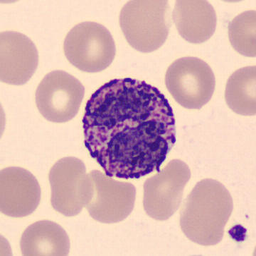

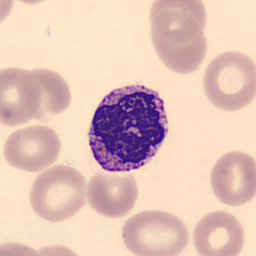

In [ ]:
import json
from PIL import Image
import io


# ======= CHECKING my wbcatt/wbc-256x256_m500.zip dataset =========
if file in file_list:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        with zip_ref.open(file) as f:
            dataset_json = json.load(f)
            labels = dataset_json.get("labels", [])
            print(f"Loaded {len(labels)} labels from {file}")
            print("Sample labels:", labels[:5])
else:
    print(f"{file} not found in the zip archive.")

sample_images = [img for img, _ in labels[:2]] if 'labels' in locals() else image_files[:3]
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for img_path in sample_images:
        with zip_ref.open(img_path) as img_file:
            img = Image.open(img_file)
            display(img)

Resource: https://github.com/itzMar00/NR-4_explaining_blood_cells/blob/main/docs/configs.md

As a rule of thumb, the value of --gamma scales quadratically with respect to the training set resolution: doubling the resolution (e.g., 256x256 → 512x512) means that --gamma should be multiplied by 4 (e.g., 2 → 8). The optimal value is usually the same for --cfg=stylegan3-t and --cfg=stylegan3-r, but considerably lower for --cfg=stylegan2.

In [7]:
# DRY RUN CHECK:
! python ../train.py --dry-run --outdir=../results --data=../wbcatt/wbc-256x256_m500.zip \
    --cfg=stylegan2 --gpus=1 --batch=16 --gamma=0.8192 --map-depth=2 --glr=0.0025 --dlr=0.0025 --cbase=16384 \
    --cond=True --aug=ada --snap 10


Training options:
{
  "G_kwargs": {
    "class_name": "training.networks_stylegan2.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "channel_base": 16384,
    "channel_max": 512,
    "fused_modconv_default": "inference_only"
  },
  "D_kwargs": {
    "class_name": "training.networks_stylegan2.Discriminator",
    "block_kwargs": {
      "freeze_layers": 0
    },
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 16384,
    "channel_max": 512
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0025
  },
  "D_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0025
  },
  "loss_kwargs": {
    "class_name": "training.loss.StyleGAN2Loss",
    "r1_gamma": 0.8192,
    "style_mixing_prob": 0.9,
    "pl_weight": 2,
    "pl_no_weight